In [1]:
from model import *
from data import *
from custom_callbacks import ValidatePredictions
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time

import tensorflow as tf


'''

    Important Model Variables
    
'''
weights_path     ='weights/'
weights_name     = "Unet_{epoch}_{dice_coef}_{loss}.h5"
batch_size       = 4
tensorboard_logs = "logs/"

'''

    Making Directories

'''

os.system(f"mkdir -p {weights_path}")
os.system(f"mkdir -p {tensorboard_logs}")

0

### Train with data generator

/home/sohaib/anaconda3/envs/tf2_9/lib/python3.8/site-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 351 images belonging to 1 classes.
Found 351 images belonging to 1 classes.


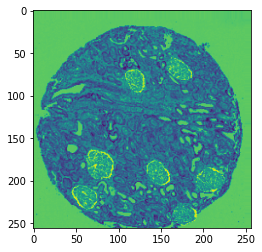

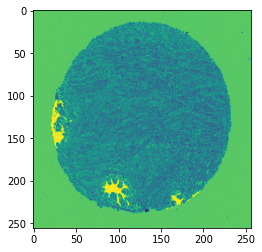

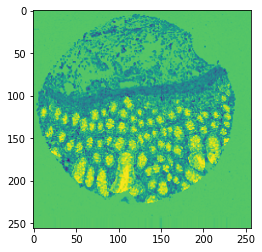

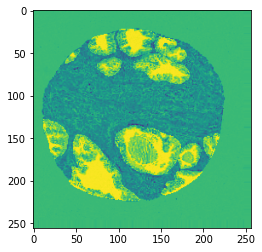

In [2]:

'''
    Data Generator
    
'''

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_generator = trainGenerator(10,'../hubmap-organ-segmentation/','train_images','masks',data_gen_args,save_to_dir = None)
val_generator = trainGenerator(10,'../hubmap-organ-segmentation/','train_images','masks',data_gen_args,save_to_dir = None)


'''

    Validate your Images

'''

image, label = next(train_generator)
for i in range(0,batch_size):
    added_image = cv2.addWeighted(image[i].squeeze(),0.4,label[i].squeeze(),0.1,0)
    plt.imshow(added_image)
    plt.show()




/tmp/ipykernel_8979/1244410765.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


1/1 [==============================] - 0s 144ms/step


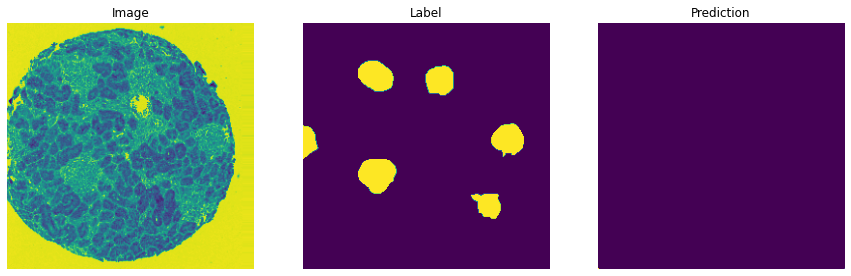

Epoch 1/1000


2022-06-26 21:51:44.241186: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  2/200 [..............................] - ETA: 57s - loss: 0.5742 - accuracy: 0.8882 - dice_coef: 0.1762 

2022-06-26 21:51:44.557574: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  3/200 [..............................] - ETA: 57s - loss: 0.5742 - accuracy: 0.8882 - dice_coef: 0.1762

2022-06-26 21:51:44.856361: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  4/200 [..............................] - ETA: 56s - loss: 0.5742 - accuracy: 0.8882 - dice_coef: 0.1762

2022-06-26 21:51:45.139716: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  5/200 [..............................] - ETA: 56s - loss: 0.5741 - accuracy: 0.8882 - dice_coef: 0.1762

2022-06-26 21:51:45.423630: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  6/200 [..............................] - ETA: 55s - loss: 0.5741 - accuracy: 0.8882 - dice_coef: 0.1762WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1089s vs `on_train_batch_end` time: 0.1829s). Check your callbacks.


2022-06-26 21:51:45.706482: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 [==============================] - 0s 14ms/step


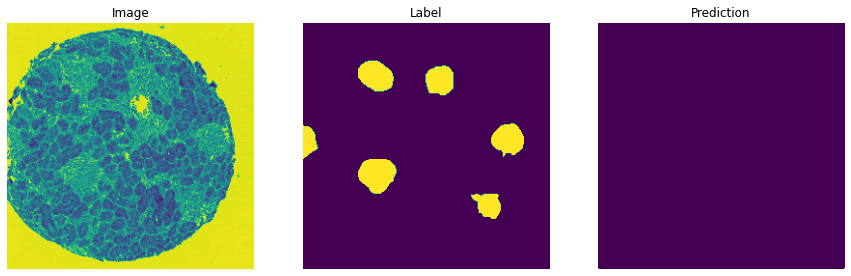

Epoch 2/1000
 76/200 [==========>...................] - ETA: 59s - loss: 0.5595 - accuracy: 0.9088 - dice_coef: 0.1481 

In [ ]:
model = unet("weights/Unet_18_0.1569012701511383_0.5726140141487122.h5")

with tf.device('/gpu:0'):
    model.fit_generator(
        train_generator,
        steps_per_epoch = 200,
        epochs = 1000,
        callbacks = [
                     ModelCheckpoint(weights_path + weights_name,save_best_only=True,save_weights_only=True), 
                     TensorBoard(log_dir="./logs"),
                     ValidatePredictions(model, val_generator)


        ],
         validation_data= val_generator,
        validation_steps= 100,
        verbose =1,
        use_multiprocessing=True,
        workers = 12
    )
